In [156]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


## Data, functions

### Genereate [-1, 1]

In [215]:
np.random.seed(1) # similarily, use seed to make pseudo-random number


In [216]:
X = np.random.uniform(low=-1, high=1, size=(10000,))

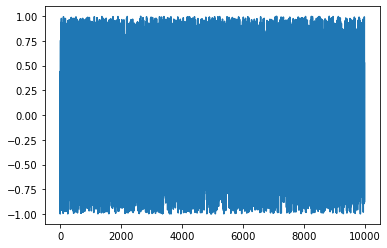

In [217]:
plt.plot(X)

### Generate noise

In [218]:

mu, sigma = 0, 0.1
noise = np.random.normal(mu, sigma, size=(10000,))

### Generate Y

In [219]:
Y = X * 1.5 + noise

### Prerequiresite

In [220]:
#np.random.uniform(low=1, high=10, size=(10,2))

In [221]:
#numpy.take_along_axis
a = np.array([1,2,3,4,5])
b = np.array([4, 3, 2, 1, 0])

In [222]:
np.take_along_axis(a, b, axis=0)

array([5, 4, 3, 2, 1])

## CDF function

In [223]:
def return_cdf(x, y):
    data = pd.DataFrame({"X":x, "Y":y})
    data = data[['X', 'Y']].sort_values(by='X').replace([np.inf, -np.inf], np.nan).dropna()
    res = (data['Y'] - data['Y'].mean()).cumsum()
    return res

## Simulation

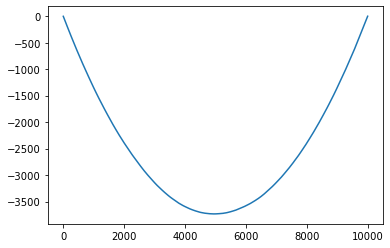

In [224]:
data = return_cdf(X, Y)

plt.plot(range(0, len(data)), data)

## Putting together

In [225]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Sigma = 0.1, corr=0.633371181206978


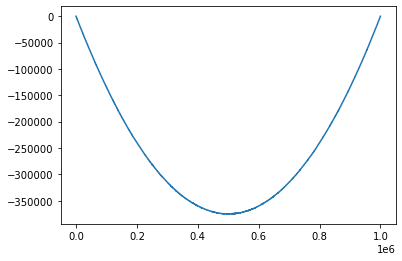

Sigma = 0.5, corr=0.17015942659214067


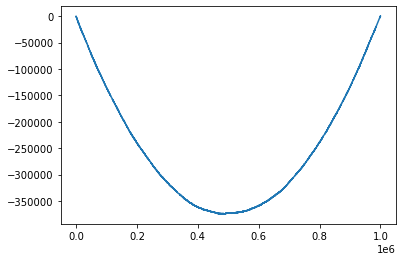

Sigma = 1, corr=0.08545597048510374


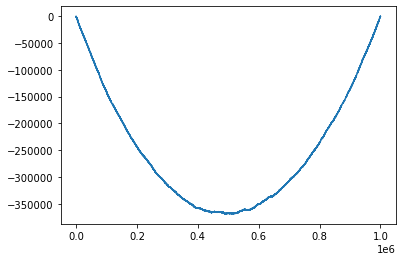

Sigma = 2, corr=0.04327543213924032


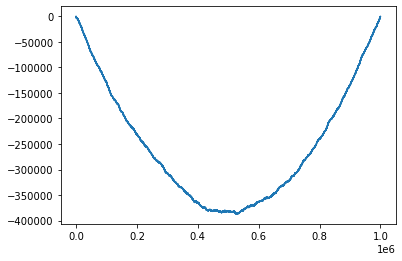

Sigma = 4, corr=0.0195301767955053


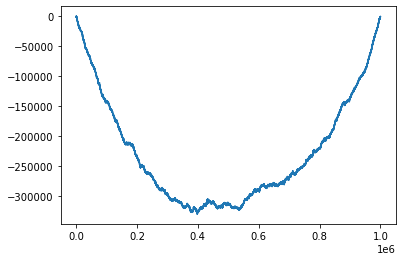

Sigma = 8, corr=0.010568034774013


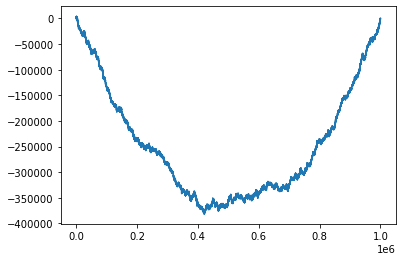

Sigma = 16, corr=0.005784138862976004


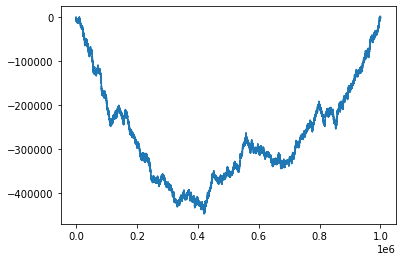

Sigma = 32, corr=0.003427475058433177


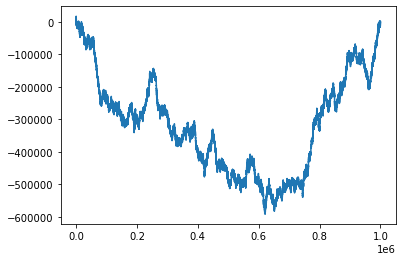

Sigma = 64, corr=-0.0003665090107331702


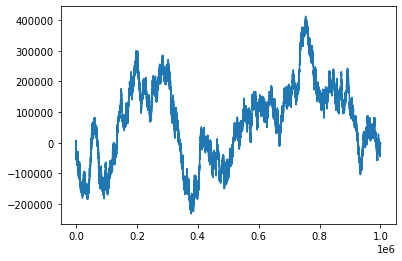

In [226]:
n = 1000*1000
X = np.random.uniform(low=-1, high=1, size=(n,))
Z = np.random.uniform(low=-2, high=2, size=(n,))

np.random.seed(1) # similarily, use seed to make pseudo-random number

for sigma in [0.1, 0.5, 1, 2, 4, 8, 16, 32, 64]: # x in [99, 100], but variance is [1, 5, ..., 640]
    
    mu = 0
    noise = np.random.normal(mu, sigma*10, size=(n,))
    Y = X * 1.5 + Z*0.3 + noise
    #Y =  noise
    #Y =  noise

    corr = np.corrcoef(X, Y)[0][1]
    print(f"Sigma = {sigma}, corr={corr}")

    data = return_cdf(X, Y)

    plt.plot(range(0, len(data)), data)
    plt.show()

# Next, how about regression on X, Y with big variance

## But before that, we creat Y with a reasonably large variance (not super big or small)

In [227]:
# note, wer X is [99, 100]
noise = np.random.normal(0, 10, size=(X.shape[0],))
Y = X * 1.5 + Z*0.3 + noise

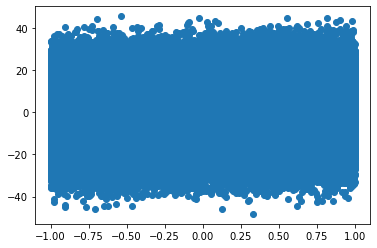

In [228]:
plt.scatter(X, Y)

In [229]:
return_slope(X, Y)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     7615.
Date:                Fri, 01 Jul 2022   Prob (F-statistic):               0.00
Time:                        16:47:51   Log-Likelihood:            -3.7220e+06
No. Observations:             1000000   AIC:                         7.444e+06
Df Residuals:                  999998   BIC:                         7.444e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X0             0.0020      0.010      0.195      0.8

X0    0.001953
X1    1.512852
dtype: float64

# Remove noises first

In [248]:
df = pd.DataFrame({'X':X, 'Y':Y, 'Z':Z})
n = int(len(df)*0.1)

temp = df.sort_values(['X'], ascending=[1]).reset_index()
xx = temp['X'].rolling(n).mean()
yy = temp['Y'].rolling(n).mean()


In [249]:
#yy, xx, zz = df['Y'].rolling(n).mean(), df['X'].rolling(n).mean(), df['Z'].rolling(n).mean()

In [250]:
# df = pd.DataFrame({'Z':Z, 'Y':Y})

# df=df.sort_values(['Z'], ascending=[1])

In [251]:
df.shape

(1000000, 3)

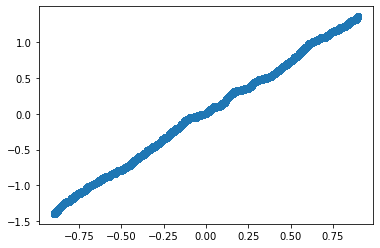

In [252]:
plt.scatter(xx, yy)

In [253]:
return_slope(xx, yy)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.202e+08
Date:                Fri, 01 Jul 2022   Prob (F-statistic):               0.00
Time:                        16:58:24   Log-Likelihood:             1.8864e+06
No. Observations:              900001   AIC:                        -3.773e+06
Df Residuals:                  899999   BIC:                        -3.773e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X0             0.0064   3.14e-05    202.728      0.0

X0    0.006358
X1    1.503830
dtype: float64

In [254]:
temp = df.sort_values(['Z'], ascending=[1]).reset_index()
zz = temp['Z'].rolling(n).mean()
yy = temp['Y'].rolling(n).mean()

In [255]:
return_slope(zz, yy)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.457e+08
Date:                Fri, 01 Jul 2022   Prob (F-statistic):               0.00
Time:                        16:58:41   Log-Likelihood:             2.0708e+06
No. Observations:              900001   AIC:                        -4.142e+06
Df Residuals:                  899999   BIC:                        -4.142e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X0            -0.0003   2.55e-05    -11.418      0.0

X0   -0.000292
X1    0.296515
dtype: float64

## How about we run a regression

In [69]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [170]:
def return_slope(xx, yy):
    import statsmodels.api as sm
    
    try:
        xx = xx.values
        yy = yy.values
    except Exception:
        pass
        
    xx = sm.add_constant(xx)
    #X = sm.add_constant(X)
    data = pd.DataFrame({'X0':xx[:, 0], 'X1':xx[:, 1], 'Y':yy})
    data = data.dropna()
    mod = sm.OLS(data['Y'], data[['X0', 'X1']])
    res = mod.fit()
    print(res.summary())
    return res.params

# CDF_by_discrete_q